Traffic Analysis and Prediction
----------

In [2]:
import pandas as pd
import numpy as np
import datetime, re, os
from matplotlib import pyplot as plt
%matplotlib inline

## Store Hours

### Read in store hours file

In [3]:
# Read the necessary sheets in the xlsx file for 2017.

xlsx1 = pd.ExcelFile('celect_store_hours_2015-2017.xlsx')
spring17_open = xlsx1.parse(8, skiprows=[i for i in range(19)])
spring17_close = xlsx1.parse(9, skiprows=[i for i in range(19)])
fall17_open = xlsx1.parse(10, skiprows=[i for i in range(19)])
fall17_close = xlsx1.parse(11, skiprows=[i for i in range(19)])

In [4]:
# Read in necessary sheet in the xlsx file for 2018.

xlsx2 = pd.ExcelFile('celect_store_hours_2018.xlsx')
quarter1 = xlsx2.parse(0, skiprows=[i for i in range(19)])
quarter2 = xlsx2.parse(1, skiprows=[i for i in range(19)])
quarter3 = xlsx2.parse(2, skiprows=[i for i in range(19)])

### Process close and open hours for 2017

In [5]:
# Select only store_id and date columns

# For spring17_open
col_spring2017_o = ['STR #']+ [i for i in spring17_open.columns.tolist() if type(i) == datetime.datetime]
spring17_open = spring17_open[col_spring2017_o]
map_spring2017_o = {i:i.strftime('%Y-%m-%d') for i in col_spring2017_o if i != 'STR #'}
spring17_open.rename(columns=map_spring2017_o, inplace=True)

# For spring17_close
col_spring2017_c = ['STR #']+ [i for i in spring17_close.columns.tolist() if type(i) == datetime.datetime]
spring17_close = spring17_close[col_spring2017_c]
map_spring2017_c = {i:i.strftime('%Y-%m-%d') for i in col_spring2017_c if i != 'STR #'}
spring17_close.rename(columns=map_spring2017_c, inplace=True)

# For fall17_open
col_fall2017_o = ['STR #']+ [i for i in fall17_open.columns.tolist() if type(i) == datetime.datetime]
fall17_open = fall17_open[col_fall2017_o]
map_fall2017_o = {i:i.strftime('%Y-%m-%d') for i in col_fall2017_o if i != 'STR #'}
fall17_open.rename(columns=map_fall2017_o, inplace=True)

# For fall17_close
col_fall2017_c = ['STR #']+ [i for i in fall17_close.columns.tolist() if type(i) == datetime.datetime]
fall17_close = fall17_close[col_fall2017_c]
map_fall2017_c = {i:i.strftime('%Y-%m-%d') for i in col_fall2017_c if i != 'STR #'}
fall17_close.rename(columns=map_fall2017_c, inplace=True)

In [6]:
# Do join to get open and close for 2017.

open_2017 = spring17_open[spring17_open['STR #'].notnull()].merge(fall17_open[fall17_open['STR #'].notnull()], on='STR #')
close_2017 = spring17_close[spring17_close['STR #'].notnull()].merge(fall17_close[fall17_close['STR #'].notnull()], on='STR #')

In [7]:
fall17_open.head(3)

,STR #,2017-07-30,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,...,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03
0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,...,9.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0
1,8.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,...,9.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0
2,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,...,9.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0


### Processing close and open hours for 2018

In [8]:
# Select only store_id and date columns

# For Quarter1 2018
col_quarter1 = ['STR #']+ [i for i in quarter1.columns.tolist() if type(i) == datetime.datetime]
quarter1 = quarter1[col_quarter1]
map_quarter1 = {i:i.strftime('%Y-%m-%d') for i in col_quarter1 if i != 'STR #'}
quarter1.rename(columns=map_quarter1, inplace=True)

# For Quarter2 2018
col_quarter2 = ['STR #']+ [i for i in quarter2.columns.tolist() if type(i) == datetime.datetime]
quarter2 = quarter2[col_quarter2]
map_quarter2 = {i:i.strftime('%Y-%m-%d') for i in col_quarter2 if i != 'STR #'}
quarter2.rename(columns=map_quarter2, inplace=True)

# For Quarter3 2018
col_quarter3 = ['STR #']+ [i for i in quarter3.columns.tolist() if type(i) == datetime.datetime]
quarter3 = quarter3[col_quarter3]
map_quarter3 = {i:i.strftime('%Y-%m-%d') for i in col_quarter3 if i != 'STR #'}
quarter3.rename(columns=map_quarter3, inplace=True)

In [9]:
# Join to get hours for 2018.

hours_2018 = quarter1[quarter1['STR #'].notnull()].merge(quarter2[quarter2['STR #'].notnull()], on='STR #')
hours_2018 = hours_2018.merge(quarter3[quarter3['STR #'].notnull()], on='STR #')

In [10]:
hours_2018.head(3)

,STR #,2018-02-04,2018-02-05,2018-02-06,2018-02-07,2018-02-08,2018-02-09,2018-02-10,2018-02-11,2018-02-12,...,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03
0,7,9a - 9p,9a - 10p,9a - 10p,9a - 10p,9a - 10p,9a - 11p,8a - 11p,9a - 9p,9a - 10p,...,9a - 10p,9a - 11p,8a - 11p,9a - 9p,9a - 10p,9a - 10p,9a - 10p,9a - 10p,9a - 11p,8a - 11p
1,8,9a - 9p,9a - 10p,9a - 10p,9a - 10p,9a - 10p,9a - 11p,8a - 11p,9a - 9p,9a - 10p,...,9a - 10p,9a - 11p,8a - 11p,9a - 9p,9a - 10p,9a - 10p,9a - 10p,9a - 10p,9a - 11p,8a - 11p
2,9,9a - 9p,9a - 10p,9a - 10p,9a - 10p,9a - 10p,9a - 11p,8a - 11p,9a - 9p,9a - 10p,...,9a - 10p,9a - 11p,8a - 11p,9a - 9p,9a - 10p,9a - 10p,9a - 10p,9a - 10p,9a - 11p,8a - 11p


### Join 2017 and 2018 store hours for each store

In [11]:
# Define functions to be used.

def getOpenHour(x):
    
    m = re.search(r'(\d+)a -', x)
    if m:
        return int(m[1])
    else:
        return None
    
def getCloseHour(x):
    
    m = re.search(r'- (\d+)p', x)
    if m:
        return int(m[1]) + 12
    else:
        return None


In [12]:
# Get store_lsit.

t1 = hours_2018['STR #'].unique().tolist()
t2 = open_2017['STR #'].unique().tolist()
store_list = [i for i in t1 if i in t2]

In [13]:
# Get open hours for all stores and write into file.

for store_id in store_list:
    
    # For 2018 store hours.
    store_hour_18 = hours_2018[hours_2018['STR #'] == store_id].T
    
    # First row is 'STR #, 7', drop first row
    store_hour_18 = store_hour_18[1:]

    # Rename the column name, this is not hard coded.
    col_old = store_hour_18.columns.tolist()[0]
    store_hour_18.rename(columns={col_old:'Range'}, inplace=True)

    # Reset_index (date) to be a column 
    store_hour_18.reset_index(inplace=True)
    store_hour_18.rename(columns={'index':'Date'}, inplace=True)
    
    store_hour_18['open'] = store_hour_18['Range'].map(lambda x: getOpenHour(x))
    store_hour_18['close'] = store_hour_18['Range'].map(lambda x: getCloseHour(x))
    store_hour_18 = store_hour_18[['Date', 'open', 'close']]
    
    ###################################################################################################################
    # For 2017 Store open hours.
    store_hour_17_o = open_2017[open_2017['STR #'] == store_id].T

    # First row is 'STR #, 7', drop first row
    store_hour_17_o = store_hour_17_o[1:]

    # Rename the column name, this is not hard coded.
    col_old2 = store_hour_17_o.columns.tolist()[0]
    store_hour_17_o.rename(columns={col_old2:'open'}, inplace=True)

    # Reset_index (date) to be a column 
    store_hour_17_o.reset_index(inplace=True)
    store_hour_17_o.rename(columns={'index':'Date'}, inplace=True)
    
    ###################################################################################################################
    # For 2017 Store close hours.

    store_hour_17_c = close_2017[close_2017['STR #'] == store_id].T

    # First row is 'STR #, 7', drop first row
    store_hour_17_c = store_hour_17_c[1:]

    # Rename the column name, this is not hard coded.
    col_old3 = store_hour_17_c.columns.tolist()[0]
    store_hour_17_c.rename(columns={col_old3:'close'}, inplace=True)

    # Reset_index (date) to be a column 
    store_hour_17_c.reset_index(inplace=True)
    store_hour_17_c.rename(columns={'index':'Date'}, inplace=True)
    
    ###################################################################################################################
    # Join 2017 open hour and close hour together.

    store_hour_17 = store_hour_17_o.merge(store_hour_17_c, on='Date')
    
    ###################################################################################################################
    store_hour = pd.concat([store_hour_17, store_hour_18])
    
    if not os.path.exists('./StoreOpenHours'):
        os.mkdir('./StoreOpenHours')
        
    store_hour.to_csv('./StoreOpenHours/StoreHour_' + str(store_id) + '.csv', index=False)

## Read in Traffic

In [14]:
# Read in Traffic data and po_date.

traffic = pd.read_csv('./Data/Hourly_Traffic Beg 17 - Aug 18.txt')
po_date = pd.read_csv('./Data/po_date_heuristic_v1.csv')

In [15]:
po_date = po_date[['CAL_EVNT_DTE', 'computed_po_date']]
po_date.rename(columns={'CAL_EVNT_DTE':'Date', 'computed_po_date':'po_date'}, inplace=True)

In [16]:
# Convert String to Datetime and back to string "2017-01-01"

traffic['TRFFC_DTE'] = pd.to_datetime(traffic.TRFFC_DTE, infer_datetime_format=True)
traffic['Date'] = traffic['TRFFC_DTE'].dt.strftime('%Y-%m-%d')

In [17]:
traffic.head(3)

,STR_ID,TRFFC_DTE,SALEHOUR,VSTR_IN_CNT,VSTR_OUT_CNT,CONVERSION_RATE,Date
0,772,2017-03-02,0,0,0,0.0,2017-03-02
1,552,2017-03-14,0,0,0,0.0,2017-03-14
2,303,2018-05-10,5,0,0,0.0,2018-05-10


In [18]:
print('Total Store Number: ', len(traffic.STR_ID.unique()))

Total Store Number:  1171


In [19]:
print('First Date: ', traffic.Date.unique().min(), 'Last Date: ', traffic.Date.unique().max())

First Date:  2016-09-27 Last Date:  2018-08-11


In [20]:
traffic.columns

Index(['STR_ID', 'TRFFC_DTE', 'SALEHOUR', 'VSTR_IN_CNT', 'VSTR_OUT_CNT',
       'CONVERSION_RATE', 'Date'],
      dtype='object')

In [21]:
# Sort by store, by date and by hour.

traffic.sort_values(by=['STR_ID', 'Date', 'SALEHOUR'], inplace=True)

### Clean traffic data for each store by store hour and Get PO Traffic

In [22]:
# Define function to use.

def cleanCount(x0, x1, x2, x3):
    
    if x1 >= x2 and x1 < x3:
        return x0
    else:
        return 0

In [23]:
# Get store list.
t1 = traffic['STR_ID'].unique().tolist()

# store_list is from store hours data.
store_list2 = [i for i in store_list if i in t1]

In [24]:
for store_id in store_list2:
    
    temp = traffic[traffic['STR_ID'] == store_id]
    temp = temp[temp['Date'] >= '2017-01-29']
    
    # Read in store hours.
    hours = pd.read_csv('./StoreOpenHours/StoreHour_' + str(store_id) + '.csv')
    
    # Merge Traffic and Hour together.
    temp = temp.merge(hours, on='Date', how='left')
    
    temp['IN_Clean'] = temp[['VSTR_IN_CNT', 'SALEHOUR', 
                         'open', 'close']].apply(lambda x: cleanCount(x[0], x[1], x[2], x[3]), axis = 1)

    temp['OUT_Clean'] = temp[['VSTR_OUT_CNT', 'SALEHOUR',  
                         'open', 'close']].apply(lambda x: cleanCount(x[0], x[1], x[2], x[3]), axis = 1)
    
    # Merge to get PO date.
    temp = temp.merge(po_date, on='Date', how='left')
    
    if not os.path.exists('./StoreHourlyTrafficClean'):
        os.mkdir('./StoreHourlyTrafficClean')
        
    temp.to_csv('./StoreHourlyTrafficClean/HourlyTrafficClean_' + str(store_id) + '.csv', index=False)

### Get PO Percent of Hourly Traffic

In [10]:
# Merge with PO_Date dataset
# Get the po_date traffic

traffic = traffic.merge(po_date, on='Date', how='left')
traffic_saved = traffic.copy()
traffic = traffic.merge(traffic[['STR_ID', 'Date', 'SALEHOUR', 'VSTR_IN_CNT']], 
                        left_on=['STR_ID', 'po_date', 'SALEHOUR'], 
                        right_on=['STR_ID', 'Date', 'SALEHOUR'], suffixes=('_0', '_po'),
                       how='left')
traffic.rename(columns={'Date_0':'Date', 'VSTR_IN_CNT_0': 'VSTR_IN_CNT'}, inplace=True)
traffic = traffic[['STR_ID', 'TRFFC_DTE', 'SALEHOUR', 'VSTR_IN_CNT', 'VSTR_OUT_CNT',
       'CONVERSION_RATE', 'Date', 'po_date', 'Date_po', 'VSTR_IN_CNT_po']]

In [11]:
# Get Daily Traffic

traffic_daily = traffic[['Date', 'STR_ID', 'VSTR_IN_CNT', 'VSTR_OUT_CNT']].groupby(['STR_ID', 
                        'Date']).agg({'VSTR_IN_CNT': np.sum, 'VSTR_OUT_CNT': np.sum}).reset_index()

In [12]:
# Get po_date Hourly traffic percent.

traffic = traffic.merge(traffic_daily[['STR_ID', 'Date', 'VSTR_IN_CNT']], 
                       left_on=['STR_ID', 'po_date'], right_on=['STR_ID', 'Date'],
                       suffixes=('_0', '_total'), how='left')
traffic.rename(columns={'Date_0':'Date', 'VSTR_IN_CNT_0': 'VSTR_IN_CNT'}, inplace=True)

def HourlyPercent(x0, x1):
    if x1 == 0:
        return 0
    else:
        return round(x0 / x1, 4)
    
traffic['hour_percent'] = traffic[['VSTR_IN_CNT_po', 'VSTR_IN_CNT_total']].apply(lambda x: HourlyPercent(x[0], x[1]), 
                                                                              axis=1)

traffic[['STR_ID', 'TRFFC_DTE', 'SALEHOUR', 'VSTR_IN_CNT', 'VSTR_OUT_CNT',
       'CONVERSION_RATE', 'Date', 'po_date', 'VSTR_IN_CNT_po',
       'VSTR_IN_CNT_total', 'hour_percent']].to_csv('Traffic_Hourly_WithPO_WithPercent.csv', index=False)

In [19]:
if False:
    store_list = traffic.STR_ID.unique().tolist()
    
    for store_id in store_list:
        temp = traffic[traffic['STR_ID'] == store_id].copy()
        temp['DTE_HR'] = pd.to_datetime(temp.Date + ' ' + temp['SALEHOUR'].astype('str') + ':00:00', infer_datetime_format=True)
        temp.to_csv('./StoreHourlyTraffic/HourlyTraffic_' + str(store_id) + '.csv', index=False)

In [14]:
temp_daily = traffic_daily[traffic_daily['STR_ID'] == 8].copy()
temp_daily['TRFFC_DTE'] = pd.to_datetime(temp_daily.Date, infer_datetime_format=True)

temp = traffic[traffic['STR_ID'] == 8].copy()
temp['TRFFC_DTE'] = pd.to_datetime(temp.Date + ' ' + temp['SALEHOUR'].astype('str') + ':00:00', infer_datetime_format=True)

In [18]:
import plotly.plotly as py
py.sign_in('justinnew','YqtA9aVcQqaZeCHN1YrG')

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
condition = (temp['Date'] >= '2017-06-12') & (temp['Date'] < '2017-06-19')
ax.plot(temp[condition].TRFFC_DTE, temp[condition].VSTR_IN_CNT, color='blue')

ax2 = fig.add_subplot(212)
condition2 = (temp['Date'] >= '2018-06-01') & (temp['Date'] < '2018-07-01')
ax2.plot(temp[condition2].TRFFC_DTE, temp[condition2].VSTR_IN_CNT, color='blue')
ax2.plot(temp[condition2].TRFFC_DTE, temp[condition2].VSTR_IN_CNT_po, color='red')
py.iplot_mpl(fig)

In [1]:
if False:
    import plotly.plotly as py
    py.sign_in('justinnew','YqtA9aVcQqaZeCHN1YrG')

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(211)
    condition = (temp['Date'] >= '2017-03-20') & (temp['Date'] < '2017-03-27')
    ax.plot(temp[condition].TRFFC_DTE, temp[condition].VSTR_IN_CNT, color='blue')

    ax2 = fig.add_subplot(212)
    condition2 = (temp['Date'] >= '2018-03-19') & (temp['Date'] < '2018-03-26')
    ax2.plot(temp[condition2].TRFFC_DTE, temp[condition2].VSTR_IN_CNT, color='blue')
    py.iplot_mpl(fig)

In [17]:
temp = traffic_daily[traffic_daily['STR_ID'] == 63].copy()
temp['TRFFC_DTE'] = pd.to_datetime(temp.Date, infer_datetime_format=True)

if False:
    import plotly.plotly as py
    py.sign_in('justinnew','YqtA9aVcQqaZeCHN1YrG')
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(111)
    ax1.plot(temp.TRFFC_DTE, temp.VSTR_IN_CNT, color='red')
    ax1.plot(temp.TRFFC_DTE, temp.VSTR_OUT_CNT, color='blue')
    py.iplot_mpl(fig)

In [18]:
store_list = traffic_daily.STR_ID.unique().tolist()

store_days = {}
for store_id in store_list:
    temp = traffic_daily[(traffic_daily['STR_ID'] == store_id) & (traffic_daily['Date'] >= '2017-01-29')].copy()
    # temp.to_csv('./StoreDailyTraffic/DailyTraffic_' + str(store_id) + '.csv')
    store_days[store_id] = len(temp)

[   0.    3.    1.    1.    3.    8.    7.   28.   65.   44.   83.  606.
  322.    0.]


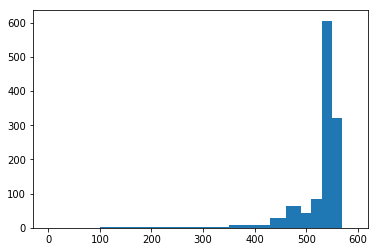

In [19]:
bin_list = [0, 100, 200, 250, 300, 350, 400, 430, 460, 490, 510, 530, 550, 570, 590]
counts, bins, fig = plt.hist(store_days.values(), bins=bin_list)
print(counts)

In [20]:
print([k for k, v in store_days.items() if v > 510])

[7, 8, 9, 10, 14, 17, 18, 19, 25, 31, 32, 34, 35, 37, 41, 43, 48, 49, 54, 55, 57, 60, 62, 63, 64, 70, 71, 72, 73, 75, 77, 79, 84, 86, 89, 91, 95, 96, 97, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 121, 123, 125, 126, 127, 129, 130, 132, 134, 136, 138, 139, 140, 141, 143, 147, 148, 149, 153, 154, 155, 156, 158, 159, 160, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 191, 193, 195, 196, 197, 198, 202, 204, 205, 206, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 244, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 292, 293, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 310, 311, 312, 313, 314, 315, 316, 3

In [21]:
print([k for k, v in store_days.items() if v < 400 and v > 300])

[190, 291, 378, 556, 558, 603, 989, 1367, 1549, 1554, 1555]
